In [66]:
#importing required libraries
import pandas as pd
import numpy as np

#ignore warning
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [67]:
car = pd.read_csv('2023 Car Dataset.csv')
import re

In [68]:
car.head()

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...","28,500",4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...","45,900",4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...","22,950",4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...","53,250",4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283 (est.),440 (est.),Automatic,5.2 seconds,140 (est.),125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...","49,990",4.9/5,"4,500"


In [69]:
#checking colmuns
car.columns

Index([' Car Make ', ' Car Model   ', ' Year ', ' Body Type ',
       ' Color Options                 ', ' Fuel Type ', ' Engine Size (L) ',
       ' Horsepower ', ' Torque (Nm) ', ' Transmission Type ',
       ' Acceleration (0-60 mph) ', ' Top Speed (mph) ', ' Mileage (MPG) ',
       ' Safety Features                                      ',
       ' Entertainment Features               ',
       ' Interior Features                                ',
       ' Exterior Features                                           ',
       ' Price ($) ', ' Customer Ratings ', ' Sales Figures (Units Sold) '],
      dtype='object')

In [70]:
#check the data type
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0    Car Make                                                      164 non-null    object
 1    Car Model                                                     164 non-null    object
 2    Year                                                          164 non-null    int64 
 3    Body Type                                                     164 non-null    object
 4    Color Options                                                 164 non-null    object
 5    Fuel Type                                                     164 non-null    object
 6    Engine Size (L)                                               164 non-null    object
 7    Horsepower                                                    164 non-

In [71]:
#remove spaces
car.columns.to_list()

[' Car Make ',
 ' Car Model   ',
 ' Year ',
 ' Body Type ',
 ' Color Options                 ',
 ' Fuel Type ',
 ' Engine Size (L) ',
 ' Horsepower ',
 ' Torque (Nm) ',
 ' Transmission Type ',
 ' Acceleration (0-60 mph) ',
 ' Top Speed (mph) ',
 ' Mileage (MPG) ',
 ' Safety Features                                      ',
 ' Entertainment Features               ',
 ' Interior Features                                ',
 ' Exterior Features                                           ',
 ' Price ($) ',
 ' Customer Ratings ',
 ' Sales Figures (Units Sold) ']

In [72]:
#remove any space in the beginning and ending of the column names
def remove_spaces(remove):
    column_names = remove.columns
    cleaned_column_names = [
        name.lstrip().rstrip() for name in column_names
    ]
    remove.columns = cleaned_column_names
    return remove

In [73]:
car.columns

Index([' Car Make ', ' Car Model   ', ' Year ', ' Body Type ',
       ' Color Options                 ', ' Fuel Type ', ' Engine Size (L) ',
       ' Horsepower ', ' Torque (Nm) ', ' Transmission Type ',
       ' Acceleration (0-60 mph) ', ' Top Speed (mph) ', ' Mileage (MPG) ',
       ' Safety Features                                      ',
       ' Entertainment Features               ',
       ' Interior Features                                ',
       ' Exterior Features                                           ',
       ' Price ($) ', ' Customer Ratings ', ' Sales Figures (Units Sold) '],
      dtype='object')

In [74]:
car = remove_spaces(car)
car.columns.to_list()

['Car Make',
 'Car Model',
 'Year',
 'Body Type',
 'Color Options',
 'Fuel Type',
 'Engine Size (L)',
 'Horsepower',
 'Torque (Nm)',
 'Transmission Type',
 'Acceleration (0-60 mph)',
 'Top Speed (mph)',
 'Mileage (MPG)',
 'Safety Features',
 'Entertainment Features',
 'Interior Features',
 'Exterior Features',
 'Price ($)',
 'Customer Ratings',
 'Sales Figures (Units Sold)']

In [75]:
#check the missing values
car.isnull().sum()

Car Make                      0
Car Model                     0
Year                          0
Body Type                     0
Color Options                 0
Fuel Type                     0
Engine Size (L)               0
Horsepower                    0
Torque (Nm)                   0
Transmission Type             0
Acceleration (0-60 mph)       0
Top Speed (mph)               0
Mileage (MPG)                 0
Safety Features               0
Entertainment Features        1
Interior Features             1
Exterior Features             1
Price ($)                     0
Customer Ratings              2
Sales Figures (Units Sold)    2
dtype: int64

In [76]:
car.iloc[:,6].value_counts()

2                    37
2.5                  35
3.5                  13
2.4                  11
1.5                  10
 N/A                  9
6.2                   9
2.3                   9
1.8                   8
1.6                   7
3                     5
5.3                   2
3.8                   2
3.6                   2
1.4                   2
4                     1
2.7                   1
5                     1
Name: Engine Size (L), dtype: int64

In [77]:
car['Engine Size (L)'].head(10)

0                  2.5
1                  3.5
2                  1.8
3                  5.3
4     N/A             
5                  2.5
6                    3
7                  2.5
8                    5
9                  2.5
Name: Engine Size (L), dtype: object

In [78]:
car['Engine Size (L)'] = car['Engine Size (L)'].apply(lambda x: x.strip())

In [79]:
def remove_empty(spaces):
    for col in spaces.columns:
        if col == 'object':
            spaces[col] = spaces[col].apply(lambda x: x.strip())
        else:
            continue
    return spaces

car = remove_empty(car)

In [80]:
car.columns

Index(['Car Make', 'Car Model', 'Year', 'Body Type', 'Color Options',
       'Fuel Type', 'Engine Size (L)', 'Horsepower', 'Torque (Nm)',
       'Transmission Type', 'Acceleration (0-60 mph)', 'Top Speed (mph)',
       'Mileage (MPG)', 'Safety Features', 'Entertainment Features',
       'Interior Features', 'Exterior Features', 'Price ($)',
       'Customer Ratings', 'Sales Figures (Units Sold)'],
      dtype='object')

In [81]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Car Make                    164 non-null    object
 1   Car Model                   164 non-null    object
 2   Year                        164 non-null    int64 
 3   Body Type                   164 non-null    object
 4   Color Options               164 non-null    object
 5   Fuel Type                   164 non-null    object
 6   Engine Size (L)             164 non-null    object
 7   Horsepower                  164 non-null    object
 8   Torque (Nm)                 164 non-null    object
 9   Transmission Type           164 non-null    object
 10  Acceleration (0-60 mph)     164 non-null    object
 11  Top Speed (mph)             164 non-null    object
 12  Mileage (MPG)               164 non-null    object
 13  Safety Features             164 non-null    object

In [82]:
#drop unwanted column
car.dropna()

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...","28,500",4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...","45,900",4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...","22,950",4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...","53,250",4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283 (est.),440 (est.),Automatic,5.2 seconds,140 (est.),125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...","49,990",4.9/5,"4,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Infiniti,QX50,2023,SUV,"Blue, Black, White",Gasoline,2,268,280,Automatic,6.7 seconds,135,29,"ABS, Airbags, Predictive Forward Collision Wa...",8-inch Dual Display System,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 20-inch Alloy Wheels ...","40,100",4.7/5,"1,800"
159,Nissan,Pathfinder,2023,SUV,"Black, White, Gray",Gasoline,3.5,284,259,Automatic,6.4 seconds,120,26,"ABS, Airbags, Intelligent Forward Collision W...",8-inch Touchscreen Display,"Cloth Seats, Keyless Entry, Tri-Zone Climate ...","LED Headlights, 18-inch Alloy Wheels ...","33,410",4.6/5,"1,600"
160,Volvo,XC60,2023,SUV,"Black, White, Silver",Gasoline,2,250,258,Automatic,6.4 seconds,140,26,"ABS, Airbags, City Safety Collision Avoidance...",9-inch Sensus Touchscreen,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 19-inch Alloy Wheels ...","42,400",4.8/5,"1,800"
161,Subaru,Legacy,2023,Sedan,"Blue, White, Gray",Gasoline,2.4,182,176,CVT,8.9 seconds,130,35,"ABS, Airbags, EyeSight Driver Assist Technolo...",11.6-inch STARLINK Display,"Cloth Seats, Keyless Entry, Dual-Zone Climate...","LED Headlights, 17-inch Alloy Wheels ...","22,995",4.7/5,"1,500"


In [83]:
car.isnull().sum()

Car Make                      0
Car Model                     0
Year                          0
Body Type                     0
Color Options                 0
Fuel Type                     0
Engine Size (L)               0
Horsepower                    0
Torque (Nm)                   0
Transmission Type             0
Acceleration (0-60 mph)       0
Top Speed (mph)               0
Mileage (MPG)                 0
Safety Features               0
Entertainment Features        1
Interior Features             1
Exterior Features             1
Price ($)                     0
Customer Ratings              2
Sales Figures (Units Sold)    2
dtype: int64

In [84]:
#replace the commas with empty strings
car['Price ($)'] = car['Price ($)'].str.replace(',', '')

In [85]:
#convert the strings to integers
car['Price ($)'] = car['Price ($)'].astype(int)

In [86]:
#Only keep the digits
car['Horsepower'] = car['Horsepower'].str.extract(pat='(\d+)', expand=False)

#convert the string to integers
car['Horsepower'] = car['Horsepower'].astype(int)

In [87]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Car Make                    164 non-null    object
 1   Car Model                   164 non-null    object
 2   Year                        164 non-null    int64 
 3   Body Type                   164 non-null    object
 4   Color Options               164 non-null    object
 5   Fuel Type                   164 non-null    object
 6   Engine Size (L)             164 non-null    object
 7   Horsepower                  164 non-null    int32 
 8   Torque (Nm)                 164 non-null    object
 9   Transmission Type           164 non-null    object
 10  Acceleration (0-60 mph)     164 non-null    object
 11  Top Speed (mph)             164 non-null    object
 12  Mileage (MPG)               164 non-null    object
 13  Safety Features             164 non-null    object

In [88]:
car['Torque (Nm)'].value_counts()

186              8
420              7
 360 (est.)      7
113              6
349              6
                ..
348              1
190              1
624              1
520              1
241              1
Name: Torque (Nm), Length: 73, dtype: int64

In [89]:
car['Torque (Nm)'] = car['Torque (Nm)'].str.extract(pat='(\d+)', expand=False)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Car Make                    164 non-null    object
 1   Car Model                   164 non-null    object
 2   Year                        164 non-null    int64 
 3   Body Type                   164 non-null    object
 4   Color Options               164 non-null    object
 5   Fuel Type                   164 non-null    object
 6   Engine Size (L)             164 non-null    object
 7   Horsepower                  164 non-null    int32 
 8   Torque (Nm)                 158 non-null    object
 9   Transmission Type           164 non-null    object
 10  Acceleration (0-60 mph)     164 non-null    object
 11  Top Speed (mph)             164 non-null    object
 12  Mileage (MPG)               164 non-null    object
 13  Safety Features             164 non-null    object

In [90]:
car['Top Speed (mph)'] = car['Top Speed (mph)'].str.extract(pat='(\d+)', expand=False)
car['Top Speed (mph)'] = car['Top Speed (mph)'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Car Make                    164 non-null    object
 1   Car Model                   164 non-null    object
 2   Year                        164 non-null    int64 
 3   Body Type                   164 non-null    object
 4   Color Options               164 non-null    object
 5   Fuel Type                   164 non-null    object
 6   Engine Size (L)             164 non-null    object
 7   Horsepower                  164 non-null    int32 
 8   Torque (Nm)                 158 non-null    object
 9   Transmission Type           164 non-null    object
 10  Acceleration (0-60 mph)     164 non-null    object
 11  Top Speed (mph)             164 non-null    int32 
 12  Mileage (MPG)               164 non-null    object
 13  Safety Features             164 non-null    object

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

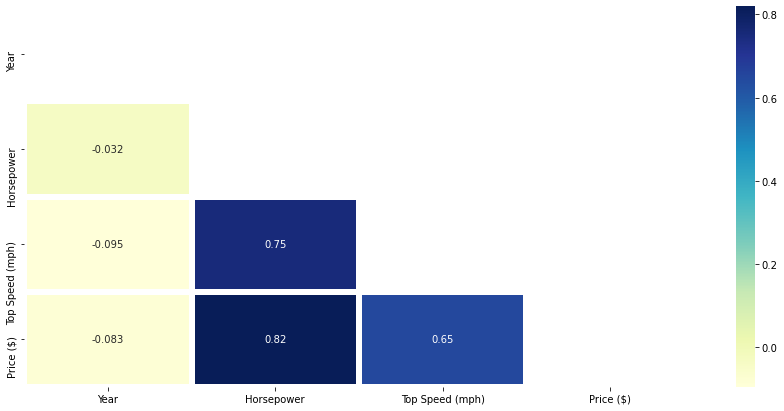

In [92]:
#visualization
plt.figure(figsize=(15,7))
sns.heatmap(car.corr(), mask=np.triu(car.corr()), annot=True, cmap='YlGnBu', linewidth=5)
plt.show()

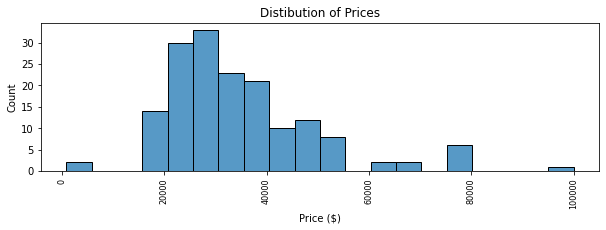

In [94]:
#Price distribution
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
sns.histplot(car['Price ($)'], bins=20)
plt.title('Distibution of Prices')
plt.xlabel('Price ($)')
plt.xticks(rotation=90, fontsize=8)

plt.show()

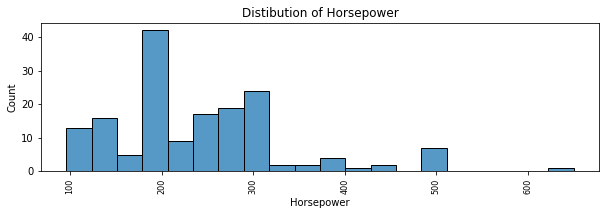

In [95]:
#Horsepower distribution
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
sns.histplot(car['Horsepower'], bins=20)
plt.title('Distibution of Horsepower')
plt.xlabel('Horsepower')
plt.xticks(rotation=90, fontsize=8)

plt.show()

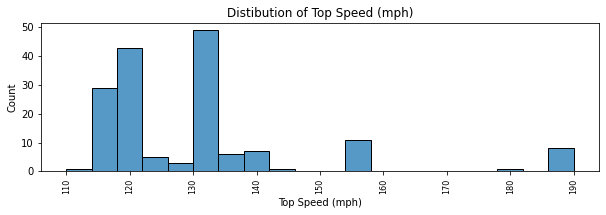

In [96]:
#Price distribution
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
sns.histplot(car['Top Speed (mph)'], bins=20)
plt.title('Distibution of Top Speed (mph)')
plt.xlabel('Top Speed (mph)')
plt.xticks(rotation=90, fontsize=8)

plt.show()

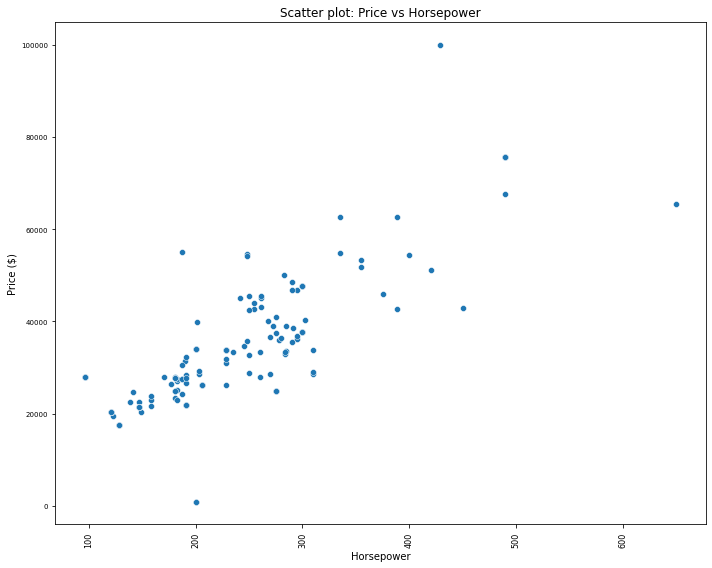

In [97]:
#Scatter plot: Price vs. Horsepower
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Horsepower', y='Price ($)', data=car)
plt.title('Scatter plot: Price vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

In [98]:
car

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...",28500,4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...",45900,4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...",22950,4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...",53250,4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283,440,Automatic,5.2 seconds,140,125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...",49990,4.9/5,"4,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Nissan,Pathfinder,2023,SUV,"Black, White, Gray",Gasoline,3.5,284,259,Automatic,6.4 seconds,120,26,"ABS, Airbags, Intelligent Forward Collision W...",8-inch Touchscreen Display,"Cloth Seats, Keyless Entry, Tri-Zone Climate ...","LED Headlights, 18-inch Alloy Wheels ...",33410,4.6/5,"1,600"
160,Volvo,XC60,2023,SUV,"Black, White, Silver",Gasoline,2,250,258,Automatic,6.4 seconds,140,26,"ABS, Airbags, City Safety Collision Avoidance...",9-inch Sensus Touchscreen,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 19-inch Alloy Wheels ...",42400,4.8/5,"1,800"
161,Subaru,Legacy,2023,Sedan,"Blue, White, Gray",Gasoline,2.4,182,176,CVT,8.9 seconds,130,35,"ABS, Airbags, EyeSight Driver Assist Technolo...",11.6-inch STARLINK Display,"Cloth Seats, Keyless Entry, Dual-Zone Climate...","LED Headlights, 17-inch Alloy Wheels ...",22995,4.7/5,"1,500"
162,Acura,MDX,2023,SUV,"Black, White, Gray",Gasoline,3.5,290,267,Automatic,6.2 seconds,130,27,"ABS, Airbags, AcuraWatch, Multi-View Rear Cam...",12.3-inch True Touchpad Interface,"Leather Seats, Keyless Entry, Panoramic Moonr...","LED Headlights, 20-inch Alloy Wheels ...",46900,4.7/5,"2,100"


In [99]:
df = pd.DataFrame(car)
df.to_csv('car.csv')
df.to_csv('C:/Users/User/Desktop/car.csv')